In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ultralytics
from IPython.display import Image
from ultralytics import YOLO

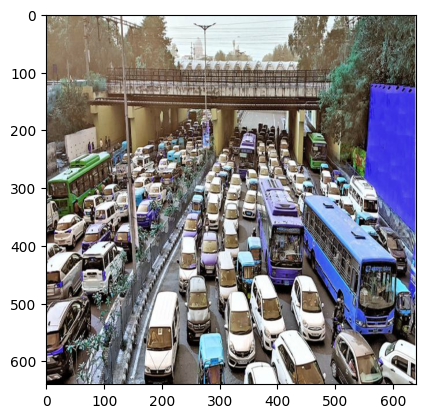

In [13]:
# read image
img = cv2.imread("image\img1.jpg")
img_mask2 = cv2.imread("image\img1_mask2.jpg")
plt.imshow(img)

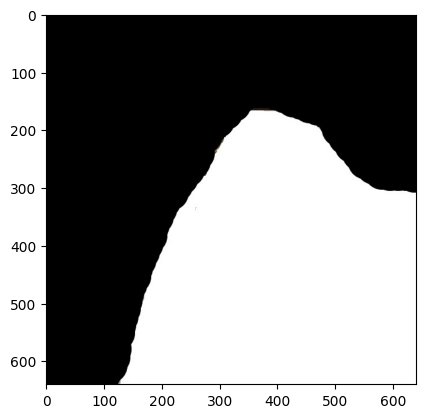

In [14]:
plt.imshow(img_mask2)

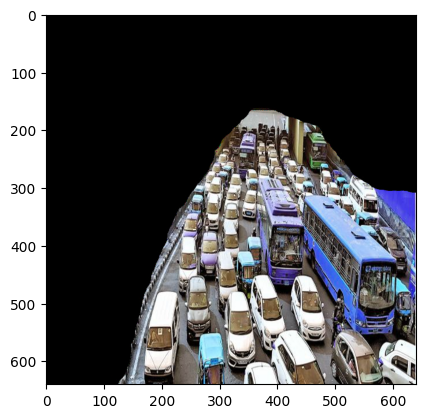

In [15]:
# phép bitwise and
# xóa phần ảnh giống nhau
img_mask = cv2.bitwise_and(img, img_mask2)
plt.imshow(img_mask)

(640, 640, 3)
Diện tích vùng pixel lớn nhất: 180966.0 pixel


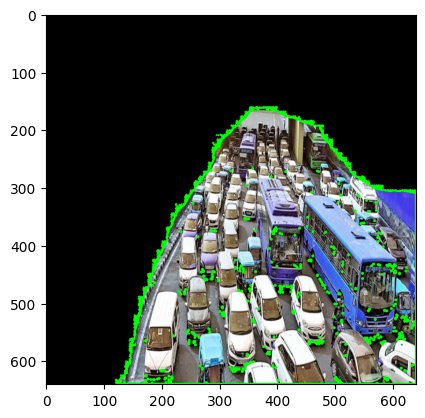

In [16]:
# tìm contours của img_mask
temp = img_mask.copy()
print(temp.shape)
gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# vẽ contours và tính diện tích contours lớn nhất
area = 0
for c in contours:
    cv2.drawContours(temp, [c], -1, (0, 255, 0), 2)
    area = max(cv2.contourArea(c), area)
# in kết quả
print(f"Diện tích vùng pixel lớn nhất: {area} pixel")
plt.imshow(temp)


0: 640x640 1 person, 12 cars, 15 buss, 2 trucks, 1711.5ms
Speed: 30.1ms preprocess, 1711.5ms inference, 223.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict5


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

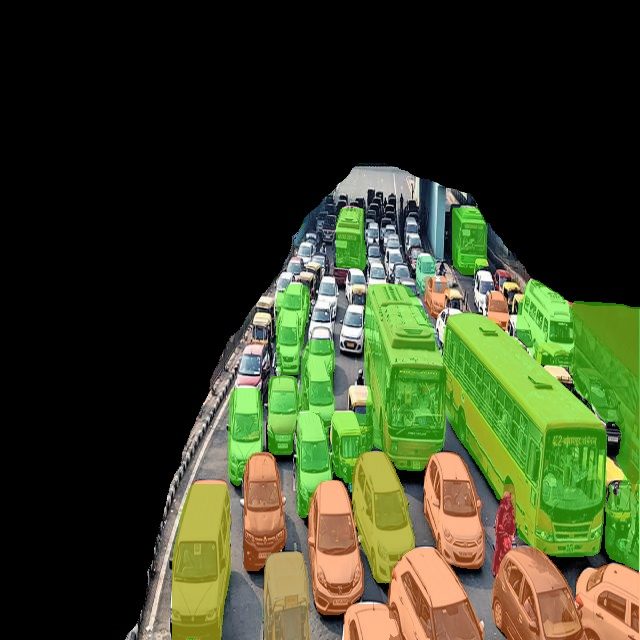

In [17]:
model = YOLO('yolov8s-seg.pt')  # set model
results = model.predict(source=img_mask, save=True, show=True, boxes = False, conf = 0.15)  # predict() returns a named tuple
# gọi danh sách các lớp đối tượng trong model
names = model.names
print(names)
list = ["car", "truck", "bus"]
Sum_area = 0
num_car = 0
# duyệt lần lượt các đối tượng nhận diện được
for i in range(len(results[0].masks)):
    # Nếu dối tượng là các xe thuộc 'list':
    if names[int(results[0].boxes.cls[i])] in list:
         # tính tổng diện tich của xe
        Sum_area += np.count_nonzero(results[0].masks.data[i])
         # đếm tổng số xe
        num_car += 1

print("total: {} pixel".format(Sum_area))
print("Số xe chiếm: {} % lòng đường".format(np.round(Sum_area/area*100, 2)))
print('Số lượng xe: {}'.format(num_car))
Image(f'{results[0].save_dir}\image0.jpg')